In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder_path = "~/Documents/THESIS/Project_Juan/"

In [3]:
volunteers = pd.read_csv(data_folder_path + 'Base_info.csv')
volunteers

,PPnr,Age,Gender,km_per_week,comf_speed
0,1,21,m,25,10.5
1,2,24,f,16,9.0
2,3,24,f,30,9.5
3,4,33,f,8,10.5
4,5,21,m,21,11.0
5,6,26,m,40,11.5
6,7,34,f,35,10.0
7,8,26,f,23,9.0
8,9,39,f,50,11.0
9,10,25,f,30,10.5


### RAW_dualbelt

In [4]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/NP01_R_2.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000
mean,20.000000,-34.633585,22.469628,624.635842,-0.132573,-0.204889,0.0,0.005500
std,11.547871,32.580114,91.717417,524.633732,25.953536,22.735815,0.0,0.073958
min,0.000000,-158.616000,-310.009000,-62.157000,-3283.982180,-2726.312740,0.0,0.000000
25%,10.000000,-53.662000,-28.630000,43.181000,-0.074620,-0.047220,0.0,0.000000
50%,20.000000,-36.789000,30.736000,681.423000,-0.016030,0.123940,0.0,0.000000
75%,30.000000,-18.815000,84.396000,1128.662000,0.043920,0.268740,0.0,0.000000
max,40.000000,123.291000,220.482000,1464.278000,793.782350,179.845380,0.0,1.000000


In [5]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/NP02_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000
mean,20.000000,-26.592568,44.412895,810.267608,-0.041070,0.168462,0.0,0.005250
std,11.547871,43.562121,116.615009,618.729306,0.207181,0.164713,0.0,0.072266
min,0.000000,-215.782000,-340.566000,34.458000,-0.261520,-0.183290,0.0,0.000000
25%,10.000000,-51.929000,-17.731000,126.687000,-0.186230,0.038850,0.0,0.000000
50%,20.000000,-29.308000,50.321000,845.691000,-0.152720,0.167990,0.0,0.000000
75%,30.000000,-5.237000,112.815000,1381.496000,0.099910,0.276700,0.0,0.000000
max,40.000000,193.670000,330.942000,1867.562000,1.040500,1.133490,0.0,1.000000


In [6]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/PNPfast_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,74964.000000,74964.000000,74964.000000,74964.000000,74964.000000,74964.000000,74964.000000,74964.000000
mean,74.963000,-22.634203,37.652411,804.167901,0.280077,0.142013,0.002228,0.005456
std,43.280774,37.203707,116.064888,606.609700,0.065488,0.172241,0.047147,0.073663
min,0.000000,-175.529000,-368.752000,17.196000,-0.004660,-0.241630,0.000000,0.000000
25%,37.481500,-42.965750,-26.014000,136.731000,0.242957,0.009210,0.000000,0.000000
50%,74.963000,-24.012000,47.383000,842.928000,0.266290,0.136905,0.000000,0.000000
75%,112.444500,-4.402000,108.382250,1357.297750,0.295800,0.244650,0.000000,0.000000
max,149.926000,170.571000,329.321000,1858.995000,1.312560,2.231580,1.000000,1.000000


In [7]:
raw_values = pd.read_csv(data_folder_path + 'RAW_dualbelt/PNPfast_R_1.csv')
calculated_values= pd.read_csv(data_folder_path + 'calculated_variables/PNPfast_R_1_calculated.csv')

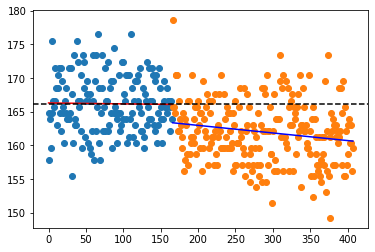

In [8]:
calculated_paced = calculated_values[calculated_values['pacing_frequency'].notna()]
calculated_not_paced = calculated_values[calculated_values['pacing_frequency'].isna()]
# print(calculated_values[calculated_values['pacing_frequency'].notna()]['step_frequency'].mean())

paced_timesteps = np.arange(0, len(calculated_paced))
no_paced_timesteps = np.arange(len(calculated_paced), len(calculated_paced)+len(calculated_not_paced))
plt.scatter(paced_timesteps, calculated_paced['step_frequency'])
z = np.polyfit(paced_timesteps, calculated_paced['step_frequency'], 1)
p = np.poly1d(z)
plt.plot(paced_timesteps, p(paced_timesteps), "r-")

plt.scatter(no_paced_timesteps, calculated_not_paced['step_frequency'])
z2 = np.polyfit(no_paced_timesteps, calculated_not_paced['step_frequency'], 1)
p2 = np.poly1d(z2)
plt.plot(no_paced_timesteps, p2(no_paced_timesteps), "b-")

plt.axhline(y=calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean(), color='k', linestyle='--')

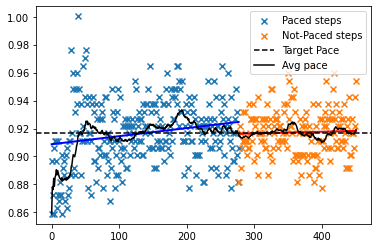

In [45]:

pace_norm = calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean()
calculated_values_norm = calculated_values.copy()
calculated_values_norm['step_frequency'] = calculated_values_norm['step_frequency']/pace_norm

calculated_paced = calculated_values_norm[calculated_values_norm['pacing_frequency'].notna()]
calculated_not_paced = calculated_values_norm[calculated_values_norm['pacing_frequency'].isna()]

paced_timesteps = np.arange(0, len(calculated_paced))
no_paced_timesteps = np.arange(len(calculated_paced), len(calculated_paced)+len(calculated_not_paced))
plt.scatter(paced_timesteps, calculated_paced['step_frequency'], marker="x", label='Paced steps')
z = np.polyfit(paced_timesteps, calculated_paced['step_frequency'], 1)
p = np.poly1d(z)
plt.plot(paced_timesteps, p(paced_timesteps), "b-", linewidth=2)

plt.scatter(no_paced_timesteps, calculated_not_paced['step_frequency'], marker="x", label='Not-Paced steps')
z2 = np.polyfit(no_paced_timesteps, calculated_not_paced['step_frequency'], 1)
p2 = np.poly1d(z2)
plt.plot(no_paced_timesteps, p2(no_paced_timesteps), "r-", linewidth=2)

plt.axhline(y=calculated_values_norm[calculated_values_norm['pacing_frequency'].notna()]['step_frequency'].mean(), color='k', linestyle='--', label='Target Pace')


m_a = calculated_values_norm['step_frequency'].ewm(alpha=0.05).mean()
m_a.plot(color="k", label='Avg pace')

plt.legend()

In [36]:
m_a_df = m_a.to_frame()
m_a_df['runner_id']= 1
m_a_df['preferred_pace'] = pace_norm
m_a_df['pacing'] = np.where(calculated_values_norm['pacing_frequency'].notna(), 1, 0)
m_a_df['time'] = calculated_values_norm['interval_footstrikes'].cumsum()
m_a_df['preferred_percentage'] = 10
m_a_df

,step_frequency,runner_id,preferred_pace,pacing,time,preferred_percentage
0,0.858916,1,182.867781,1,0.382,10
1,0.878170,1,182.867781,1,0.748,10
2,0.876224,1,182.867781,1,1.124,10
3,0.884350,1,182.867781,1,1.486,10
4,0.878729,1,182.867781,1,1.868,10
...,...,...,...,...,...,...
447,0.916536,1,182.867781,0,160.414,10
448,0.916028,1,182.867781,0,160.776,10
449,0.917368,1,182.867781,0,161.124,10
450,0.917582,1,182.867781,0,161.480,10


In [11]:
pd.read_csv(data_folder_path + 'calculated_variables/PNPfast_R_1_calculated.csv')

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.364,0.362,164.835,165.746
1,0.380,0.360,157.895,166.667
2,0.366,0.362,163.934,165.746
3,0.376,0.360,159.574,166.667
4,0.342,0.362,175.439,165.746
...,...,...,...,...
403,0.374,NaN,160.428,NaN
404,0.368,NaN,163.043,NaN
405,0.374,NaN,160.428,NaN
406,0.384,NaN,156.250,NaN


In [12]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/PNPpref_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,74876.000000,74876.000000,74876.000000,74876.000000,74876.000000,74876.000000,74876.000000,74876.000000
mean,74.875000,7.185532,28.870086,792.021678,0.280287,0.154212,0.002003,0.005088
std,43.229967,41.910822,119.805824,610.777799,0.063713,0.186628,0.044714,0.071152
min,0.000000,-176.033000,-376.942000,12.541000,-0.213450,-0.315510,0.000000,0.000000
25%,37.437500,-14.002250,-37.565500,114.093750,0.249770,0.010117,0.000000,0.000000
50%,74.875000,6.238000,37.280000,839.367000,0.271020,0.148025,0.000000,0.000000
75%,112.312500,26.972000,97.987000,1360.572500,0.297223,0.270650,0.000000,0.000000
max,149.750000,214.375000,325.700000,1870.165000,1.108690,2.358520,1.000000,1.000000


In [13]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/CP103_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,80684.000000,80684.000000,80684.000000,80684.000000,80684.000000,80684.000000,80684.000000,80684.000000
mean,80.683000,-38.096272,29.166003,759.045075,0.424417,0.251273,0.005292,0.005664
std,46.583218,44.729670,117.607689,592.206377,3.199984,1.076739,0.072556,0.075047
min,0.000000,-215.997000,-403.016000,-3.457000,-402.330230,-180.457550,0.000000,0.000000
25%,40.341500,-62.703750,-30.237500,88.159750,0.254340,0.112800,0.000000,0.000000
50%,80.683000,-37.847500,36.939000,846.323000,0.326360,0.249055,0.000000,0.000000
75%,121.024500,-13.621250,116.212500,1328.536750,0.479392,0.383500,0.000000,0.000000
max,161.366000,156.649000,283.689000,1822.315000,707.588440,129.243350,1.000000,1.000000


In [14]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/IP103_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,79974.000000,79974.000000,79974.000000,79974.000000,79974.000000,79974.000000,79974.000000,79974.000000
mean,79.973000,-40.992118,35.050988,768.230148,0.409427,0.230027,0.003226,0.005664
std,46.173299,44.090871,115.642475,598.832859,0.282788,0.215472,0.056707,0.075049
min,0.000000,-226.161000,-372.479000,-7.445000,-4.261500,-2.320730,0.000000,0.000000
25%,39.986500,-66.120500,-22.064750,93.613750,0.256483,0.093442,0.000000,0.000000
50%,79.973000,-40.965500,42.719500,844.890000,0.324805,0.220315,0.000000,0.000000
75%,119.959500,-16.334000,118.533000,1346.993750,0.500635,0.355038,0.000000,0.000000
max,159.946000,192.873000,276.829000,1809.663000,45.597770,11.537690,1.000000,1.000000


In [15]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/CP110_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,77629.000000,77629.000000,77629.000000,77629.000000,77629.000000,77629.000000,77629.000000,77629.000000
mean,77.628000,-46.317141,42.044923,775.233808,0.389954,0.129673,0.005939,0.006132
std,44.819413,48.502571,105.136557,608.144811,0.213221,0.204733,0.076833,0.078065
min,0.000000,-255.700000,-413.242000,9.303000,0.125040,-0.876990,0.000000,0.000000
25%,38.814000,-70.028000,-12.172000,97.753000,0.228570,-0.009350,0.000000,0.000000
50%,77.628000,-46.699000,48.252000,803.268000,0.323800,0.106890,0.000000,0.000000
75%,116.442000,-22.332000,115.267000,1368.736000,0.502500,0.233070,0.000000,0.000000
max,155.256000,140.189000,283.866000,1885.122000,4.053770,3.327680,1.000000,1.000000


In [16]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/IP110_R_1.csv').describe()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
count,81082.000000,81082.000000,81082.000000,81082.000000,81082.000000,81082.000000,81082.000000,81082.000000
mean,81.081000,-52.679755,47.255018,776.751143,0.389135,0.167589,0.003441,0.006093
std,46.813003,50.165231,107.007267,600.676944,0.194544,0.193077,0.058559,0.077817
min,0.000000,-256.979000,-378.459000,12.811000,0.122080,-0.680810,0.000000,0.000000
25%,40.540500,-76.746750,-8.752000,102.429250,0.237003,0.033272,0.000000,0.000000
50%,81.081000,-52.920500,53.691500,818.426000,0.335340,0.146425,0.000000,0.000000
75%,121.621500,-28.025250,122.851500,1369.211750,0.491780,0.270085,0.000000,0.000000
max,162.162000,141.851000,309.343000,1855.354000,3.140950,1.971650,1.000000,1.000000


### RAW_headset

In [17]:
pd.read_csv(data_folder_path + 'RAW_headset/NP01_R_2_headset.csv').describe()

,time,ax,ay,az,timestamp,beepbop
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000
mean,491.312000,-7.117117,6.274674,-0.760983,0.0,491.352271
std,11.547871,7.107761,5.645368,1.446823,0.0,11.550285
min,471.312000,-26.510900,-2.383795,-6.156717,0.0,471.310000
25%,481.312000,-13.814025,1.014935,-1.445961,0.0,481.310000
50%,491.312000,-5.955763,5.265410,-0.366924,0.0,491.300000
75%,501.312000,-0.102150,11.035463,0.226810,0.0,501.400000
max,511.312000,2.575957,21.758938,3.237353,0.0,511.400000


In [18]:
pd.read_csv(data_folder_path + 'RAW_headset/NP02_R_2_headset.csv').describe()

,time,ax,ay,az,timestamp,beepbop
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000
mean,50.198000,-7.337387,6.024294,-1.261010,0.0,50.206223
std,11.547871,7.666091,5.770469,1.683983,0.0,11.563210
min,30.198000,-29.669335,-2.624960,-7.348964,0.0,30.187000
25%,40.198000,-14.886582,0.728628,-2.162981,0.0,40.183000
50%,50.198000,-5.548056,4.729209,-0.672315,0.0,50.179000
75%,60.198000,0.003652,11.021897,0.015306,0.0,60.181000
max,70.198000,2.401267,21.136694,1.368577,0.0,70.277000


In [19]:
pd.read_csv(data_folder_path + 'RAW_headset/PNPfast_R_2_headset.csv').head()

,time,ax,ay,az,timestamp,beepbop
0,14.758,-2.941207,0.778647,-0.028842,0,14.697
1,14.760,-2.598074,0.533161,0.002640,0,14.697
2,14.762,-2.262355,0.314842,-0.021209,0,14.697
3,14.764,-1.915347,0.090039,-0.052178,0,14.697
4,14.766,-1.582235,-0.074288,-0.049884,0,14.697


In [20]:
pd.read_csv(data_folder_path + 'RAW_headset/PNPpref_R_2_headset.csv').head()

,time,ax,ay,az,timestamp,beepbop
0,14.958,-7.115734,8.003204,0.279845,0,14.894
1,14.960,-4.587226,7.097754,0.272158,0,14.894
2,14.962,-3.090340,6.464921,0.500347,0,14.894
3,14.964,-2.639375,5.878021,0.604168,0,14.894
4,14.966,-3.113178,5.484114,0.622502,0,14.894


### Calculated Variables

In [21]:
pd.read_csv(data_folder_path + 'calculated_variables/NP01_R_1_calculated.csv').head(10)

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.392,NaN,153.061,NaN
1,0.396,NaN,151.515,NaN
2,0.412,NaN,145.631,NaN
3,0.404,NaN,148.515,NaN
4,0.402,NaN,149.254,NaN
5,0.390,NaN,153.846,NaN
6,0.404,NaN,148.515,NaN
7,0.388,NaN,154.639,NaN
8,0.410,NaN,146.341,NaN
9,0.396,NaN,151.515,NaN


In [22]:
pd.read_csv(data_folder_path + 'calculated_variables/NP02_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,NaN,161.290,NaN
1,0.384,NaN,156.250,NaN
2,0.366,NaN,163.934,NaN
3,0.384,NaN,156.250,NaN
4,0.370,NaN,162.162,NaN


In [23]:
pd.read_csv(data_folder_path + 'calculated_variables/PNPfast_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.364,0.362,164.835,165.746
1,0.380,0.360,157.895,166.667
2,0.366,0.362,163.934,165.746
3,0.376,0.360,159.574,166.667
4,0.342,0.362,175.439,165.746


In [24]:
pd.read_csv(data_folder_path + 'calculated_variables/PNPpref_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.384,0.402,156.250,149.254
1,0.306,0.400,196.078,150.000
2,0.246,0.402,243.902,149.254
3,0.310,0.400,193.548,150.000
4,0.350,0.402,171.429,149.254


In [25]:
pd.read_csv(data_folder_path + 'calculated_variables/CP103_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,0.354,161.290,169.492
1,0.364,0.350,164.835,171.429
2,0.360,0.354,166.667,169.492
3,0.362,0.350,165.746,171.429
4,0.382,0.354,157.068,169.492


In [26]:
pd.read_csv(data_folder_path + 'calculated_variables/IP103_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.374,0.354,160.428,169.492
1,0.368,0.350,163.043,171.429
2,0.372,0.352,161.290,170.455
3,0.370,0.352,162.162,170.455
4,0.376,0.352,159.574,170.455


In [27]:
pd.read_csv(data_folder_path + 'calculated_variables/CP110_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,0.326,161.290,184.049
1,0.356,0.326,168.539,184.049
2,0.364,0.326,164.835,184.049
3,0.364,0.326,164.835,184.049
4,0.368,0.326,163.043,184.049


In [28]:
pd.read_csv(data_folder_path + 'calculated_variables/IP110_R_1_calculated.csv')

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.380,0.326,157.895,184.049
1,0.360,0.326,166.667,184.049
2,0.368,0.326,163.043,184.049
3,0.356,0.326,168.539,184.049
4,0.362,0.326,165.746,184.049
...,...,...,...,...
488,0.330,NaN,181.818,NaN
489,0.320,NaN,187.500,NaN
490,0.338,NaN,177.515,NaN
491,0.332,NaN,180.723,NaN


# Plot the pace

In [29]:
participant_number = str(4)

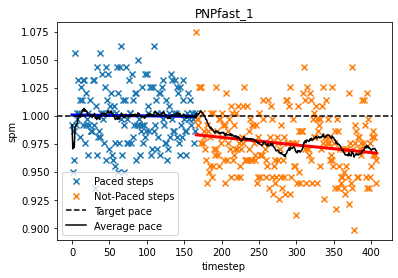

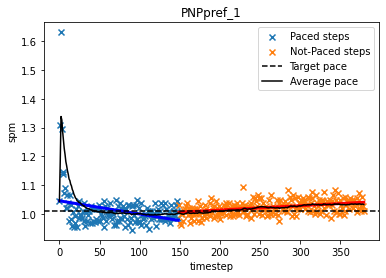

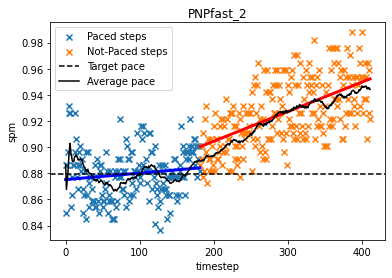

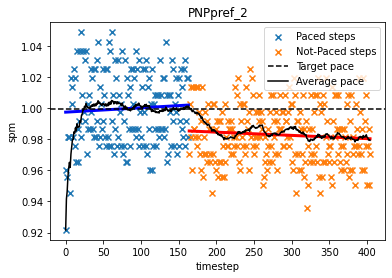

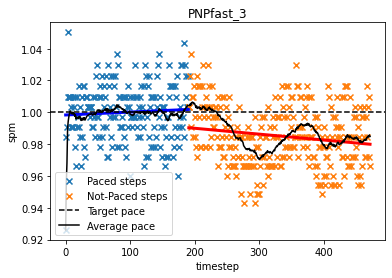

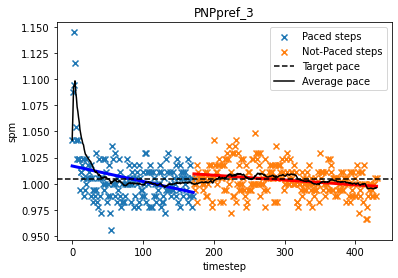

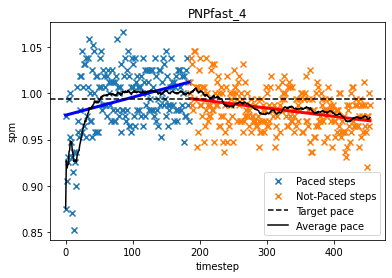

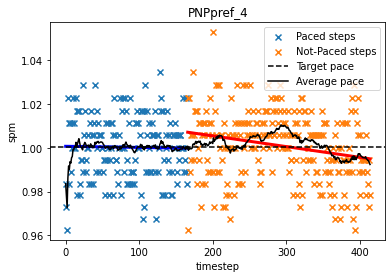

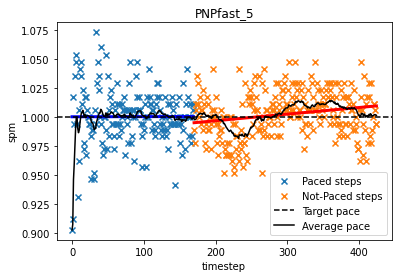

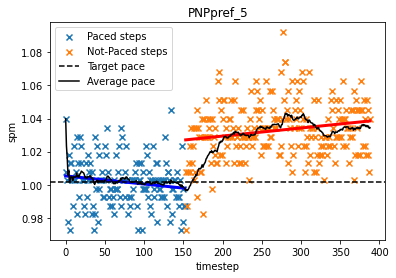

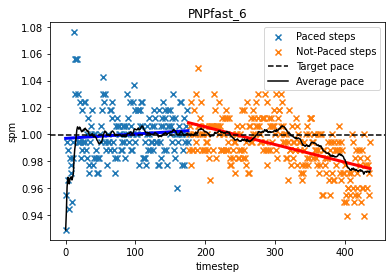

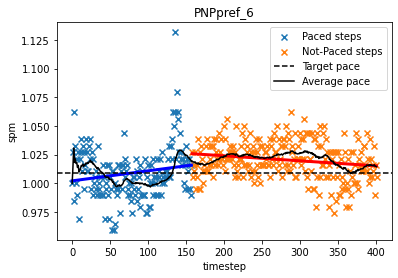

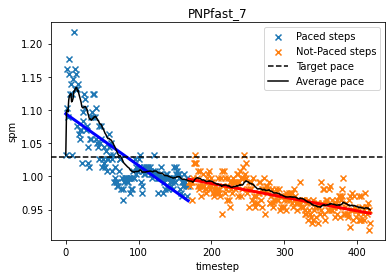

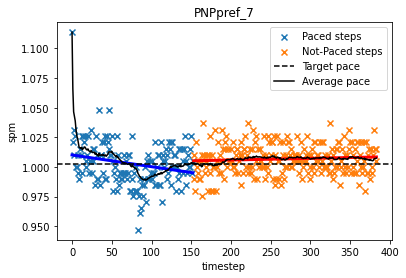

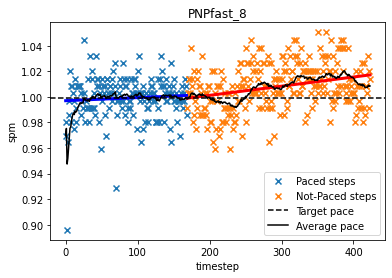

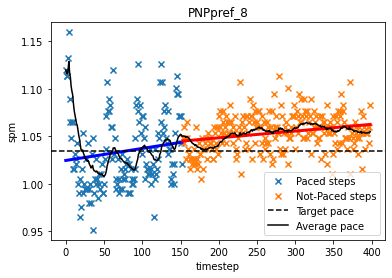

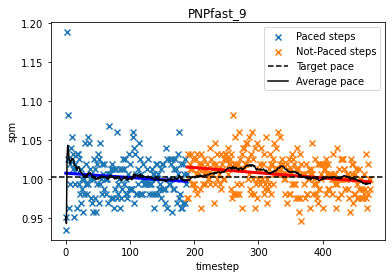

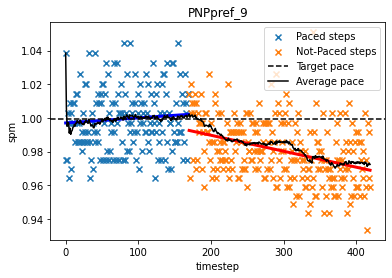

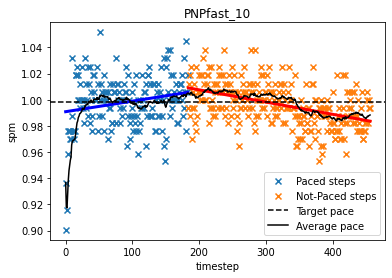

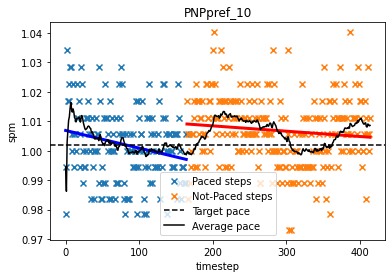

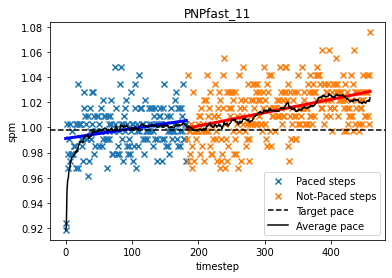

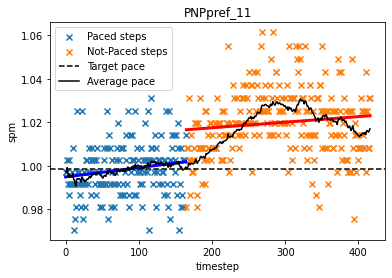

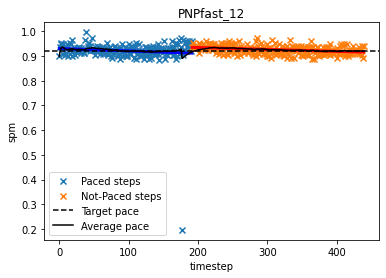

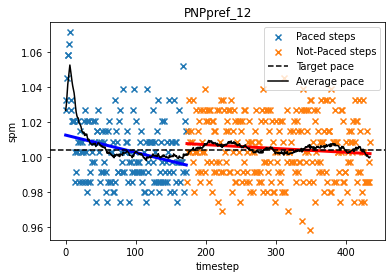

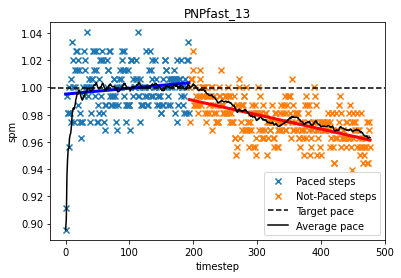

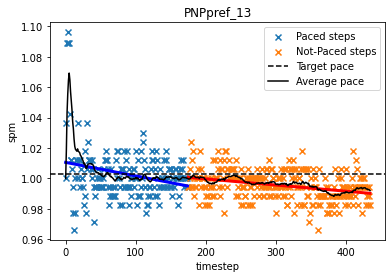

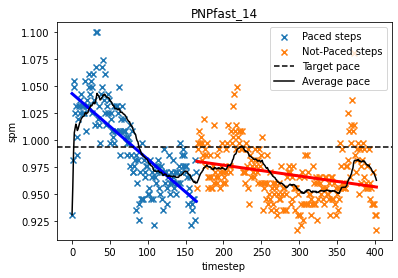

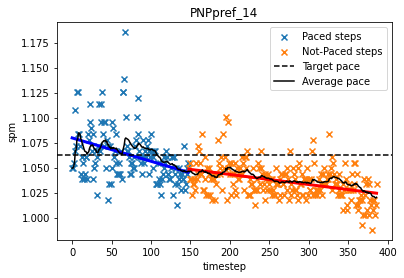

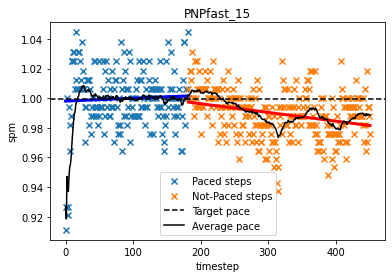

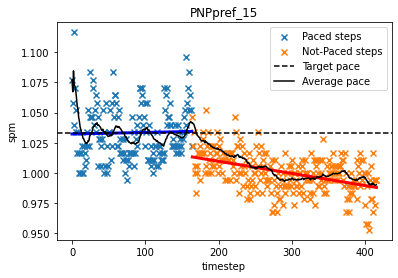

In [46]:
# tests = ['NP01', 'NP02', 'PNPfast', 'PNPpref', 'CP103', 'IP103', 'CP110', 'IP110']
tests = ['PNPfast', 'PNPpref']
for participant in range(1, 16, 1):
    participant_number = str(participant)

    for i in range(len(tests)):
        # plt.subplot(len(tests)*100+11+i)
        calculated_values = pd.read_csv(data_folder_path + ('calculated_variables/%s_R_%s_calculated.csv')%(tests[i], participant_number))

        pace_norm = calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean()
        calculated_values_norm = calculated_values.copy()
        calculated_values_norm['step_frequency'] = calculated_values_norm['step_frequency']/pace_norm

        calculated_paced = calculated_values_norm[calculated_values['pacing_frequency'].notna()]
        calculated_not_paced = calculated_values_norm[calculated_values['pacing_frequency'].isna()]

        paced_timesteps = np.arange(0, len(calculated_paced))
        no_paced_timesteps = np.arange(len(calculated_paced), len(calculated_paced)+len(calculated_not_paced))
        plt.scatter(paced_timesteps, calculated_paced['step_frequency'], marker="x", label='Paced steps')
        z = np.polyfit(paced_timesteps, calculated_paced['step_frequency'], 1)
        p = np.poly1d(z)
        plt.plot(paced_timesteps, p(paced_timesteps), "b-", linewidth=3)

        plt.scatter(no_paced_timesteps, calculated_not_paced['step_frequency'], label='Not-Paced steps')
        z2 = np.polyfit(no_paced_timesteps, calculated_not_paced['step_frequency'], 1)
        p2 = np.poly1d(z2)
        plt.plot(no_paced_timesteps, p2(no_paced_timesteps), "r-", linewidth=3)

        plt.axhline(y=calculated_values_norm[calculated_values_norm['pacing_frequency'].notna()]['step_frequency'].mean(), color='k', linestyle='--', label='Target pace')

        m_a = calculated_values_norm['step_frequency'].ewm(alpha=0.05).mean()
        m_a.plot(color="k", label='Average pace')

        plt.legend()

        plt.ylabel(r'spm')
        plt.xlabel(r'timestep')
        plt.title(tests[i]+"_"+participant_number)
        plt.show()




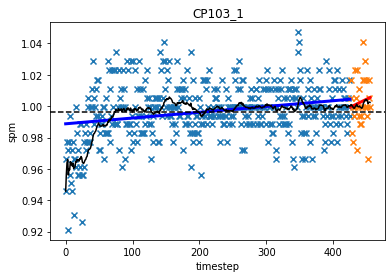

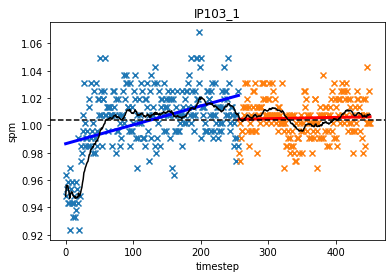

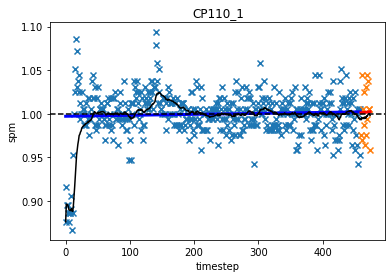

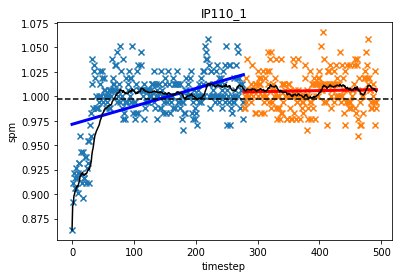

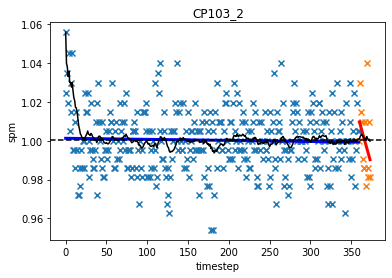

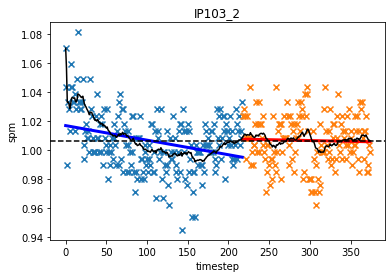

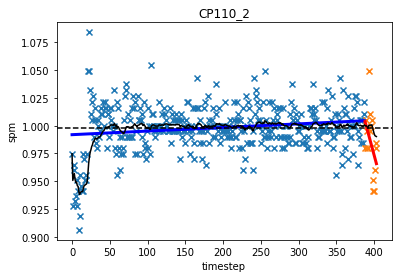

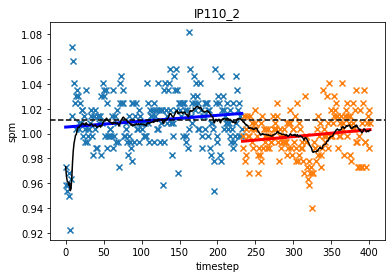

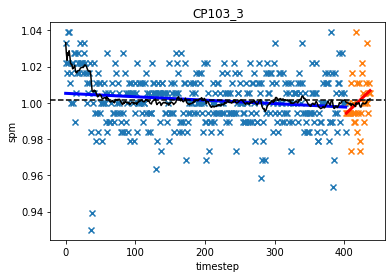

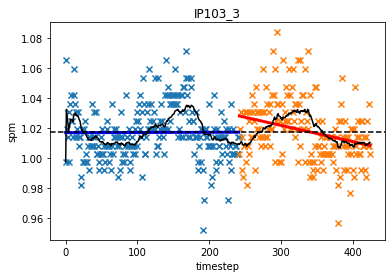

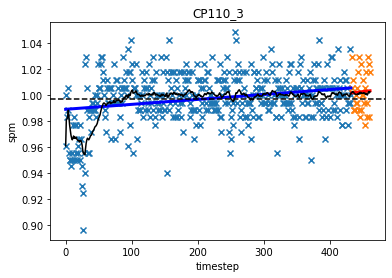

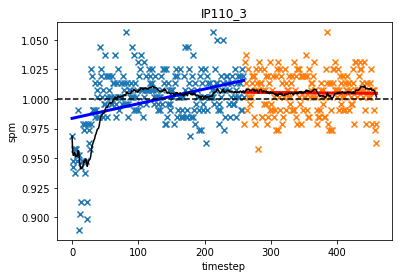

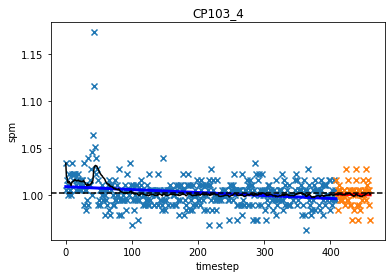

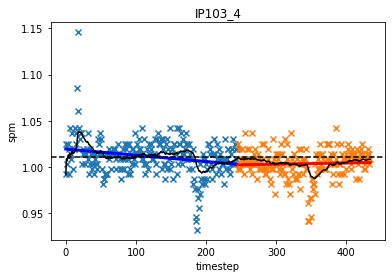

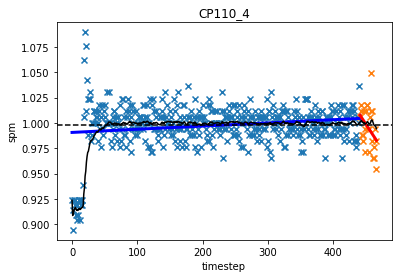

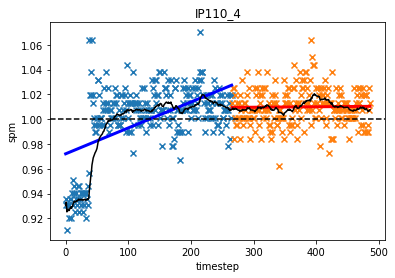

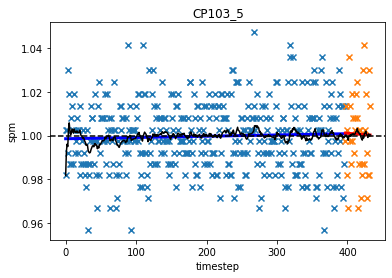

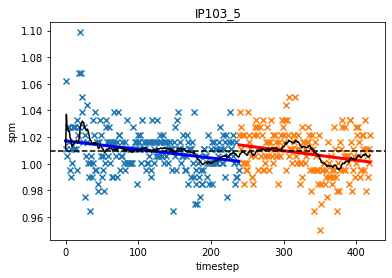

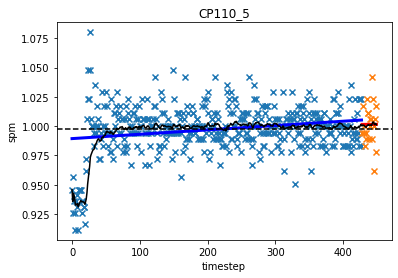

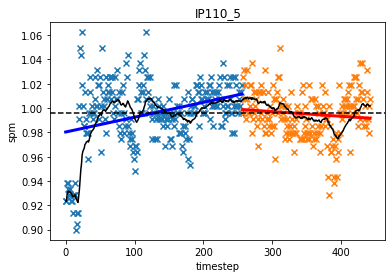

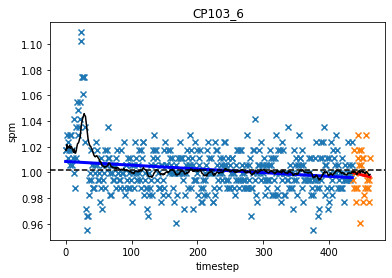

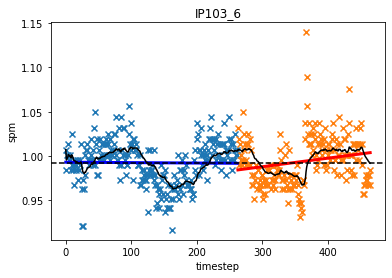

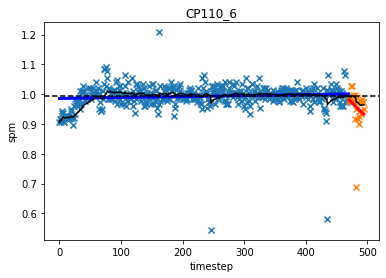

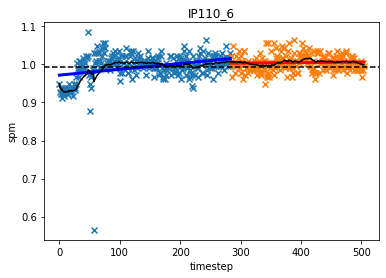

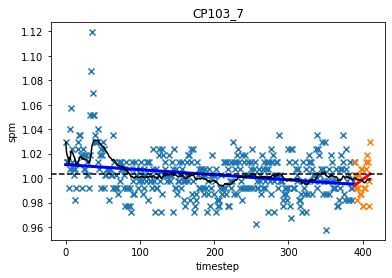

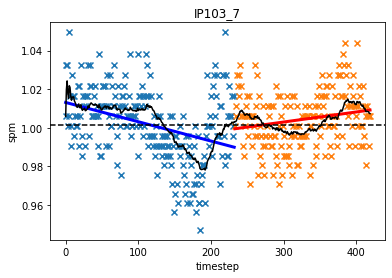

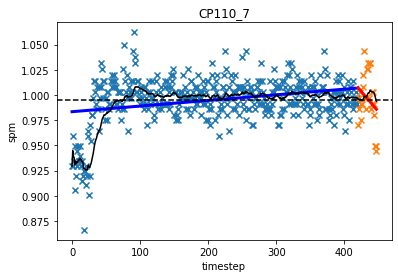

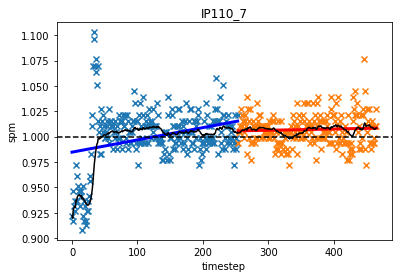

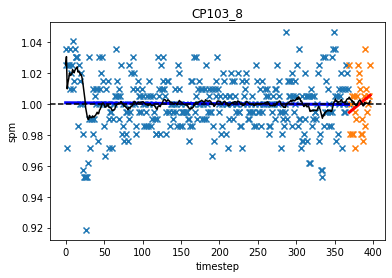

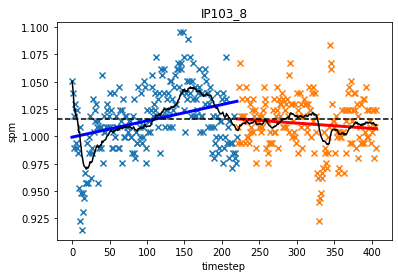

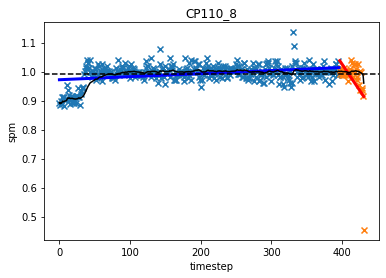

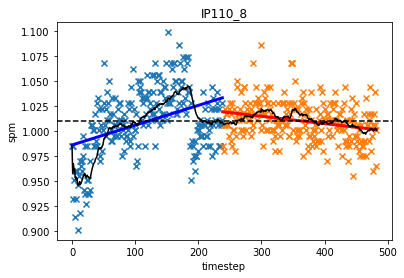

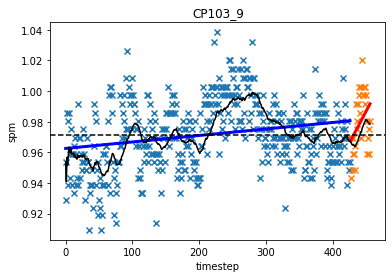

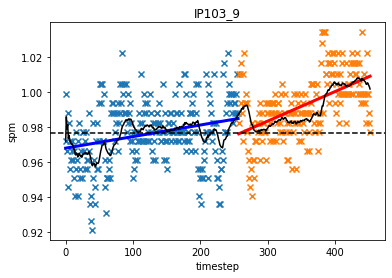

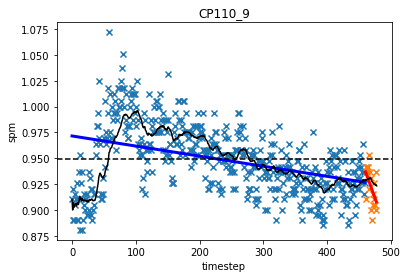

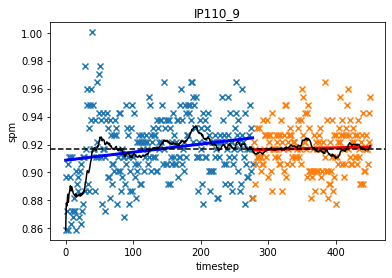

In [31]:
tests = ['CP103', 'IP103', 'CP110', 'IP110']
for participant in range(1, 10, 1):
    participant_number = str(participant)

    for i in range(len(tests)):
        # plt.subplot(len(tests)*100+11+i)
        calculated_values = pd.read_csv(data_folder_path + ('calculated_variables/%s_R_%s_calculated.csv')%(tests[i], participant_number))

        pace_norm = calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean()
        calculated_values_norm = calculated_values.copy()
        calculated_values_norm['step_frequency'] = calculated_values_norm['step_frequency']/pace_norm

        calculated_paced = calculated_values_norm[calculated_values['pacing_frequency'].notna()]
        calculated_not_paced = calculated_values_norm[calculated_values['pacing_frequency'].isna()]

        paced_timesteps = np.arange(0, len(calculated_paced))
        no_paced_timesteps = np.arange(len(calculated_paced), len(calculated_paced)+len(calculated_not_paced))
        plt.scatter(paced_timesteps, calculated_paced['step_frequency'], marker="x")
        z = np.polyfit(paced_timesteps, calculated_paced['step_frequency'], 1)
        p = np.poly1d(z)
        plt.plot(paced_timesteps, p(paced_timesteps), "b-", linewidth=3)

        plt.scatter(no_paced_timesteps, calculated_not_paced['step_frequency'], marker="x")
        z2 = np.polyfit(no_paced_timesteps, calculated_not_paced['step_frequency'], 1)
        p2 = np.poly1d(z2)
        plt.plot(no_paced_timesteps, p2(no_paced_timesteps), "r-", linewidth=3)

        plt.axhline(y=calculated_values_norm[calculated_values_norm['pacing_frequency'].notna()]['step_frequency'].mean(), color='k', linestyle='--')

        m_a = calculated_values_norm['step_frequency'].ewm(alpha=0.05).mean()
        m_a.plot(color="k")

        plt.ylabel(r'spm')
        plt.xlabel(r'timestep')
        plt.title(tests[i]+"_"+participant_number)
        plt.show()

In [32]:
def numpy_ewma_vectorized_v2(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha
    n = data.shape[0]

    pows = alpha_rev**(np.arange(n+1))

    scale_arr = 1/pows[:-1]
    offset = data[0]*pows[1:]
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

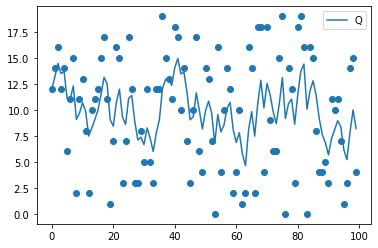

In [33]:
y_data = np.random.randint(0,20,(100))
df = pd.DataFrame({'Q': y_data})
x_data = np.arange(0,len(y_data))
window = 20
# numpy_ewma_vectorized_v2(y_data, window)
m_a = df.ewm(alpha=0.3).mean()
m_a.plot()
plt.scatter(x_data, y_data)
# plt.plot(x_data, numpy_ewma_vectorized_v2(y_data, window), 'r')